In [1]:
#Importing libraries will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

## Goals
- Analyze data about alcochol consumption quantity based on online survey.
- Visualize results of analysis to more detailed description of results.

## Table of Contents
1. [Project-and-Dataset-description](#1.-Project-and-Dataset-description)
2. [Data Importing and Cleaning](#2.-Data-Importing-and-Cleaning)
3. [Heat Map](#3.-Heat-Map)
4. [Nominal Data Analysis](#4.-Nominal-Data-Analysis)
5. [Ordinal Data Analysis](#5.-Ordinal-Data-Analysis)

# 1. Project and Dataset description

Our aim in this project was to make analysis on how much alcochol drink students in difference of some social or family statuses. 

Parameters used in this analysis:
- sex(male or female)
- age(from 17 - 22 included)
- home address type(urban or rural)
- family size (less or equal 3, greater than 3)
- parent's cohabitation status (living together or apart)
- mother's education (1-none, 2- secondary education, 3-incomplete higher education, 4-higher education)
- father's education (1-none, 2- secondary education, 3-incomplete higher education, 4-higher education)
- mother's job (teacher, healthcare, civil, services (e.g. administrative or - police), at home, other)
- father's job (teacher, healthcare, civil, services (e.g. administrative or - police), at home, other)
- traveltime (home to school travel time. Number, for example 1-1 hour)
- studytime (weekly study time. Number, for example 1-1 hour)
- failures (number of retakes (for example 1 - 1 retake))
- scholarship (Yes or No)
- family educational support (Yes or No)
- activities (Is in activity club(Yes or No))
- wants to take higher education (Yes or No)
- Internet access at home (Yes or No)
- with a romantic relationship (Yes NO)
- quality of family relationships (from 1 to 5)
- free time after lessons(from 1 to 5)
- going out with friends(from 1 to 5)
- workday alcohol consumption(from 1 to 5)
- weekend alcohol consumption(from 1 to 5)
- current health status(from 1 to 5)
- number of absences(from 0 to 93)

# 2. Data Importing and Cleaning

In [2]:
# For the first I downloaded all the survey answers to excel file and after that made hand markings 
# I can not use automatical editing tools yet and for the analysis i needed similar data.
# After downloading excel i edited it to common view and after that changed it to csv format
df_xlsx = pd.read_excel('alcohol consumption.xlsx')
df_xlsx.to_csv('alcohol consumption.csv', encoding='utf-8')
df = pd.read_csv('alcohol consumption.csv')
df = df.drop(columns=['Отметка времени'])# Deleted time column
df.iloc[0]

Unnamed: 0                                       0
sex                                         female
age                                             21
home address type                            urban
family size                         greater than 3
parent's cohabitation status       living together
mother's education                               3
father's education                               3
mother's job                               teacher
father's job                                 other
traveltime                                     0.5
studytime                                       19
failures                                         6
scholarship                                     No
family educational support                     Yes
activities                                     Yes
wants to take higher education                  No
Internet access at home                        Yes
with a romantic relationship                    No
quality of family relationships

In [3]:
df['workday alcohol consumption'].value_counts(dropna=False)
#To see distribution of workday alcohol consumption values

1    172
5     24
3     16
2     16
4     10
Name: workday alcohol consumption, dtype: int64

In [4]:
df['weekend alcohol consumption'].value_counts(dropna=False)
#To see distribution of weekend alcohol consumption values

1    160
5     35
3     19
2     13
4     11
Name: weekend alcohol consumption, dtype: int64

In [5]:
df[['workday alcohol consumption', 'weekend alcohol consumption']].value_counts()
# We want to see if there is someone who pointed '1' in both parameters(question in the survey).

workday alcohol consumption  weekend alcohol consumption
1                            1                              149
5                            5                               17
3                            3                               11
1                            5                                9
                             2                                6
                             3                                5
2                            2                                5
4                            1                                4
2                            1                                4
4                            5                                3
3                            5                                3
5                            4                                3
1                            4                                3
2                            5                                3
5                            1                 

In [8]:
df['target'] = (df['workday alcohol consumption']*df['weekend alcohol consumption'] > 1).astype(int)
# By this we created new column(variable) which "tells" us who drink or not. If the multiplication parameters 
# 'workday alcohol consumption' and 'weekend alcohol consumption' equals 1 that means that this student does not drink.
# And drniks otherwise. Result more than > 1 drinks

In [9]:
df['target'].value_counts()# And we have new binary int 'target' column, where 0 - doesn't drink and 1 - drink
# And now we can make analysisc on collected data

0    149
1     89
Name: target, dtype: int64

# 3. Taking correllations and show distributions
Here we want to show correllations between parameters and how they distribute in the whole dataset

In [10]:
df.iloc[0]

Unnamed: 0                                       0
sex                                         female
age                                             21
home address type                            urban
family size                         greater than 3
parent's cohabitation status       living together
mother's education                               3
father's education                               3
mother's job                               teacher
father's job                                 other
traveltime                                     0.5
studytime                                       19
failures                                         6
scholarship                                     No
family educational support                     Yes
activities                                     Yes
wants to take higher education                  No
Internet access at home                        Yes
with a romantic relationship                    No
quality of family relationships

In [11]:
df.corr()
# The more the age the more failures or retakes

,Unnamed: 0,age,mother's education,father's education,traveltime,studytime,failures,quality of family relationships,free time after lessons,going out with friends,workday alcohol consumption,weekend alcohol consumption,current health status,target
Unnamed: 0,1.000000,0.001875,0.102505,0.085829,0.089121,0.135275,-0.006054,0.036482,0.034632,0.017052,0.017309,0.047261,0.090536,0.061997
age,0.001875,1.000000,0.052320,0.017053,0.039466,0.062079,0.203489,-0.012524,-0.020062,0.051873,0.117620,0.125373,-0.071373,0.163583
mother's education,0.102505,0.052320,1.000000,0.578995,-0.017403,0.072848,0.096776,0.367193,0.208101,0.245150,-0.052261,-0.168375,0.315063,-0.178583
father's education,0.085829,0.017053,0.578995,1.000000,0.008667,0.030276,0.093052,0.276054,0.138499,0.081910,-0.131560,-0.151086,0.200639,-0.190422
traveltime,0.089121,0.039466,-0.017403,0.008667,1.000000,0.103297,0.091929,-0.045825,-0.024575,-0.008821,-0.031860,0.005566,-0.038604,0.002554
studytime,0.135275,0.062079,0.072848,0.030276,0.103297,1.000000,-0.057094,0.038416,-0.172374,-0.173913,-0.082857,-0.025895,-0.086814,-0.026446
failures,-0.006054,0.203489,0.096776,0.093052,0.091929,-0.057094,1.000000,-0.057128,0.080607,0.127027,0.044363,-0.005868,0.049237,0.037239
quality of family relationships,0.036482,-0.012524,0.367193,0.276054,-0.045825,0.038416,-0.057128,1.000000,0.221629,0.167172,0.048250,-0.072668,0.256156,-0.055002
free time after lessons,0.034632,-0.020062,0.208101,0.138499,-0.024575,-0.172374,0.080607,0.221629,1.000000,0.470268,0.154893,0.198527,0.337293,0.063217
going out with friends,0.017052,0.051873,0.245150,0.081910,-0.008821,-0.173913,0.127027,0.167172,0.470268,1.000000,0.280619,0.202975,0.405876,0.203675


In [12]:
df.columns

Index(['Unnamed: 0', 'sex ', 'age', 'home address type', 'family size',
       'parent's cohabitation status', 'mother's education',
       'father's education', 'mother's job ', 'father's job ', 'traveltime',
       'studytime', 'failures', 'scholarship', 'family educational support',
       'activities', 'wants to take higher education ',
       'Internet access at home', 'with a romantic relationship ',
       'quality of family relationships', 'free time after lessons',
       'going out with friends', 'workday alcohol consumption',
       'weekend alcohol consumption', 'current health status',
       'number of absences', 'target'],
      dtype='object')

<AxesSubplot:xlabel='sex '>

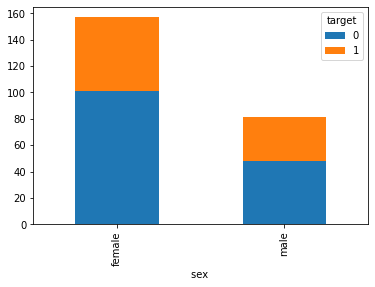

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = df.groupby(['sex ','target'])['sex '].count().unstack('target').fillna(0)
df2[[0,1]].plot(kind='bar', stacked=True)
# Here we can see that the number of drinking girls is more than boys, but surveyed girls are also more than boys
# So, it means that sex is not a criteria for drinking person
# 3rd hypothesis refuted

<AxesSubplot:xlabel="mother's education">

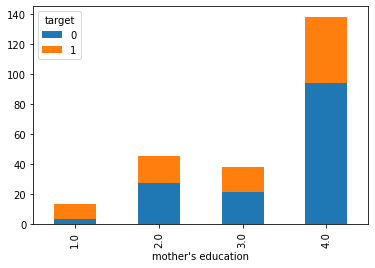

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df3 = df.groupby(["mother's education",'target'])["mother's education"].count().unstack('target').fillna(0)
df3[[0,1]].plot(kind='bar', stacked=True)
# new hyp, mother's edu affects to cons of alc,the lower the level of edu, the more heir children drink

<AxesSubplot:xlabel="father's education">

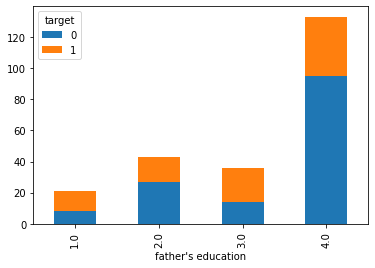

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df4 = df.groupby(["father's education",'target'])["father's education"].count().unstack('target').fillna(0)
df4[[0,1]].plot(kind='bar', stacked=True)
# new hyp, father's edu affects to cons of alc,the lower the level of edu, the more heir children drink

In [16]:
df4

target,0,1
father's education,,
1.0,8,13
2.0,27,16
3.0,14,22
4.0,95,38


In [17]:
df3

target,0,1
mother's education,,
1.0,3,10
2.0,27,18
3.0,21,17
4.0,94,44


<AxesSubplot:xlabel='current health status'>

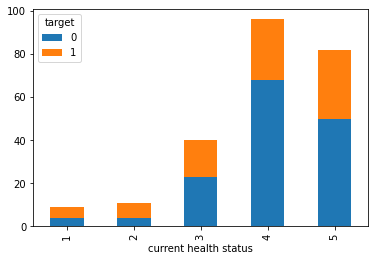

In [18]:
df2 = df.groupby(["current health status",'target'])["current health status"].count().unstack('target').fillna(0)
df2[[0,1]].plot(kind='bar', stacked=True)
# 6th Hypotesis not refuted

In [19]:
df2

target,0,1
current health status,,
1,4,5
2,4,7
3,23,17
4,68,28
5,50,32


<AxesSubplot:xlabel='free time after lessons'>

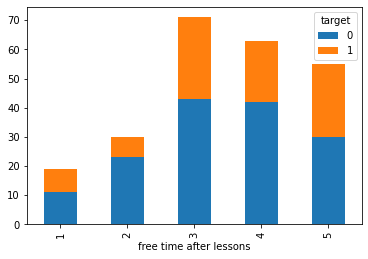

In [20]:
df5 = df.groupby(["free time after lessons",'target'])["free time after lessons"].count().unstack('target').fillna(0)
df5[[0,1]].plot(kind='bar', stacked=True)
# new hyp. the more free time, the more drink alc

In [21]:
df5

target,0,1
free time after lessons,,
1,11,8
2,23,7
3,43,28
4,42,21
5,30,25


<AxesSubplot:xlabel='home address type'>

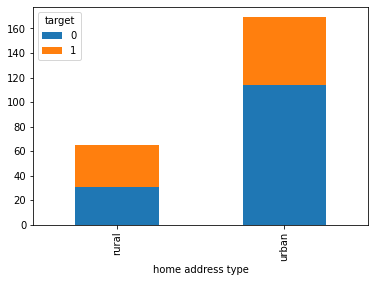

In [22]:
df5 = df.groupby(["home address type",'target'])["home address type"].count().unstack('target').fillna(0)
df5[[0,1]].plot(kind='bar', stacked=True)
# 1st Hypotesis confirmed

In [23]:
df5

target,0,1
home address type,,
rural,31,34
urban,114,55


<AxesSubplot:xlabel="parent's cohabitation status">

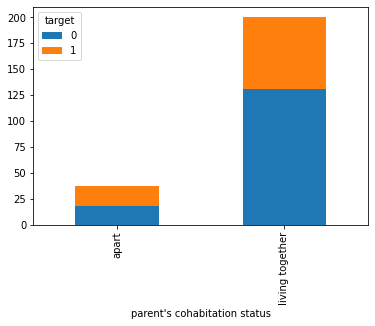

In [24]:
df7 = df.groupby(["parent's cohabitation status",'target'])["parent's cohabitation status"].count().unstack('target').fillna(0)
df7[[0,1]].plot(kind='bar', stacked=True)
# 5th Hypotesis confirmed

In [25]:
df7

target,0,1
parent's cohabitation status,,
apart,18,19
living together,131,69


<AxesSubplot:xlabel='target', ylabel='quality of family relationships'>

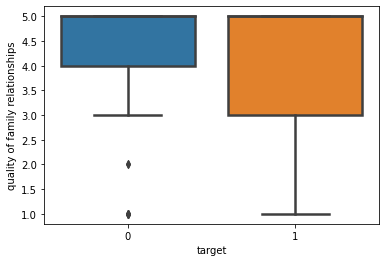

In [26]:
sns.boxplot(x="target", y="quality of family relationships",  data=df, linewidth=2.5) 
# The more the quality of relationships the more that the student doesn't drink
# 4th hyp confirmed

<AxesSubplot:xlabel='failures'>

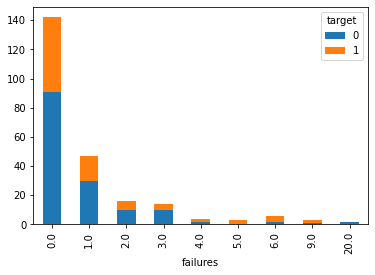

In [30]:
df4 = df.groupby(["failures",'target'])["failures"].count().unstack('target').fillna(0)
df4[[0,1]].plot(kind='bar', stacked=True)
# 2nd hyp is refuted
# alcohol does not affect academic performance

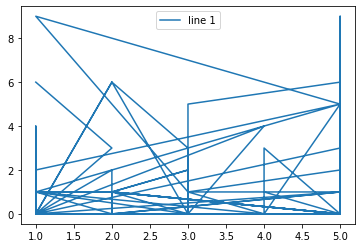

In [27]:
import matplotlib.pyplot as plt
# plot lines
plt.plot(df[df.target==1]['workday alcohol consumption'], df[df.target==1].failures, label = "line 1")
#plt.plot(y, x, label = "line 2")
plt.legend()
plt.show()
# At the very beginning we wanted to create line plots, but they did not mean anything and 
# that is why we decided to work with bar charts and box plots

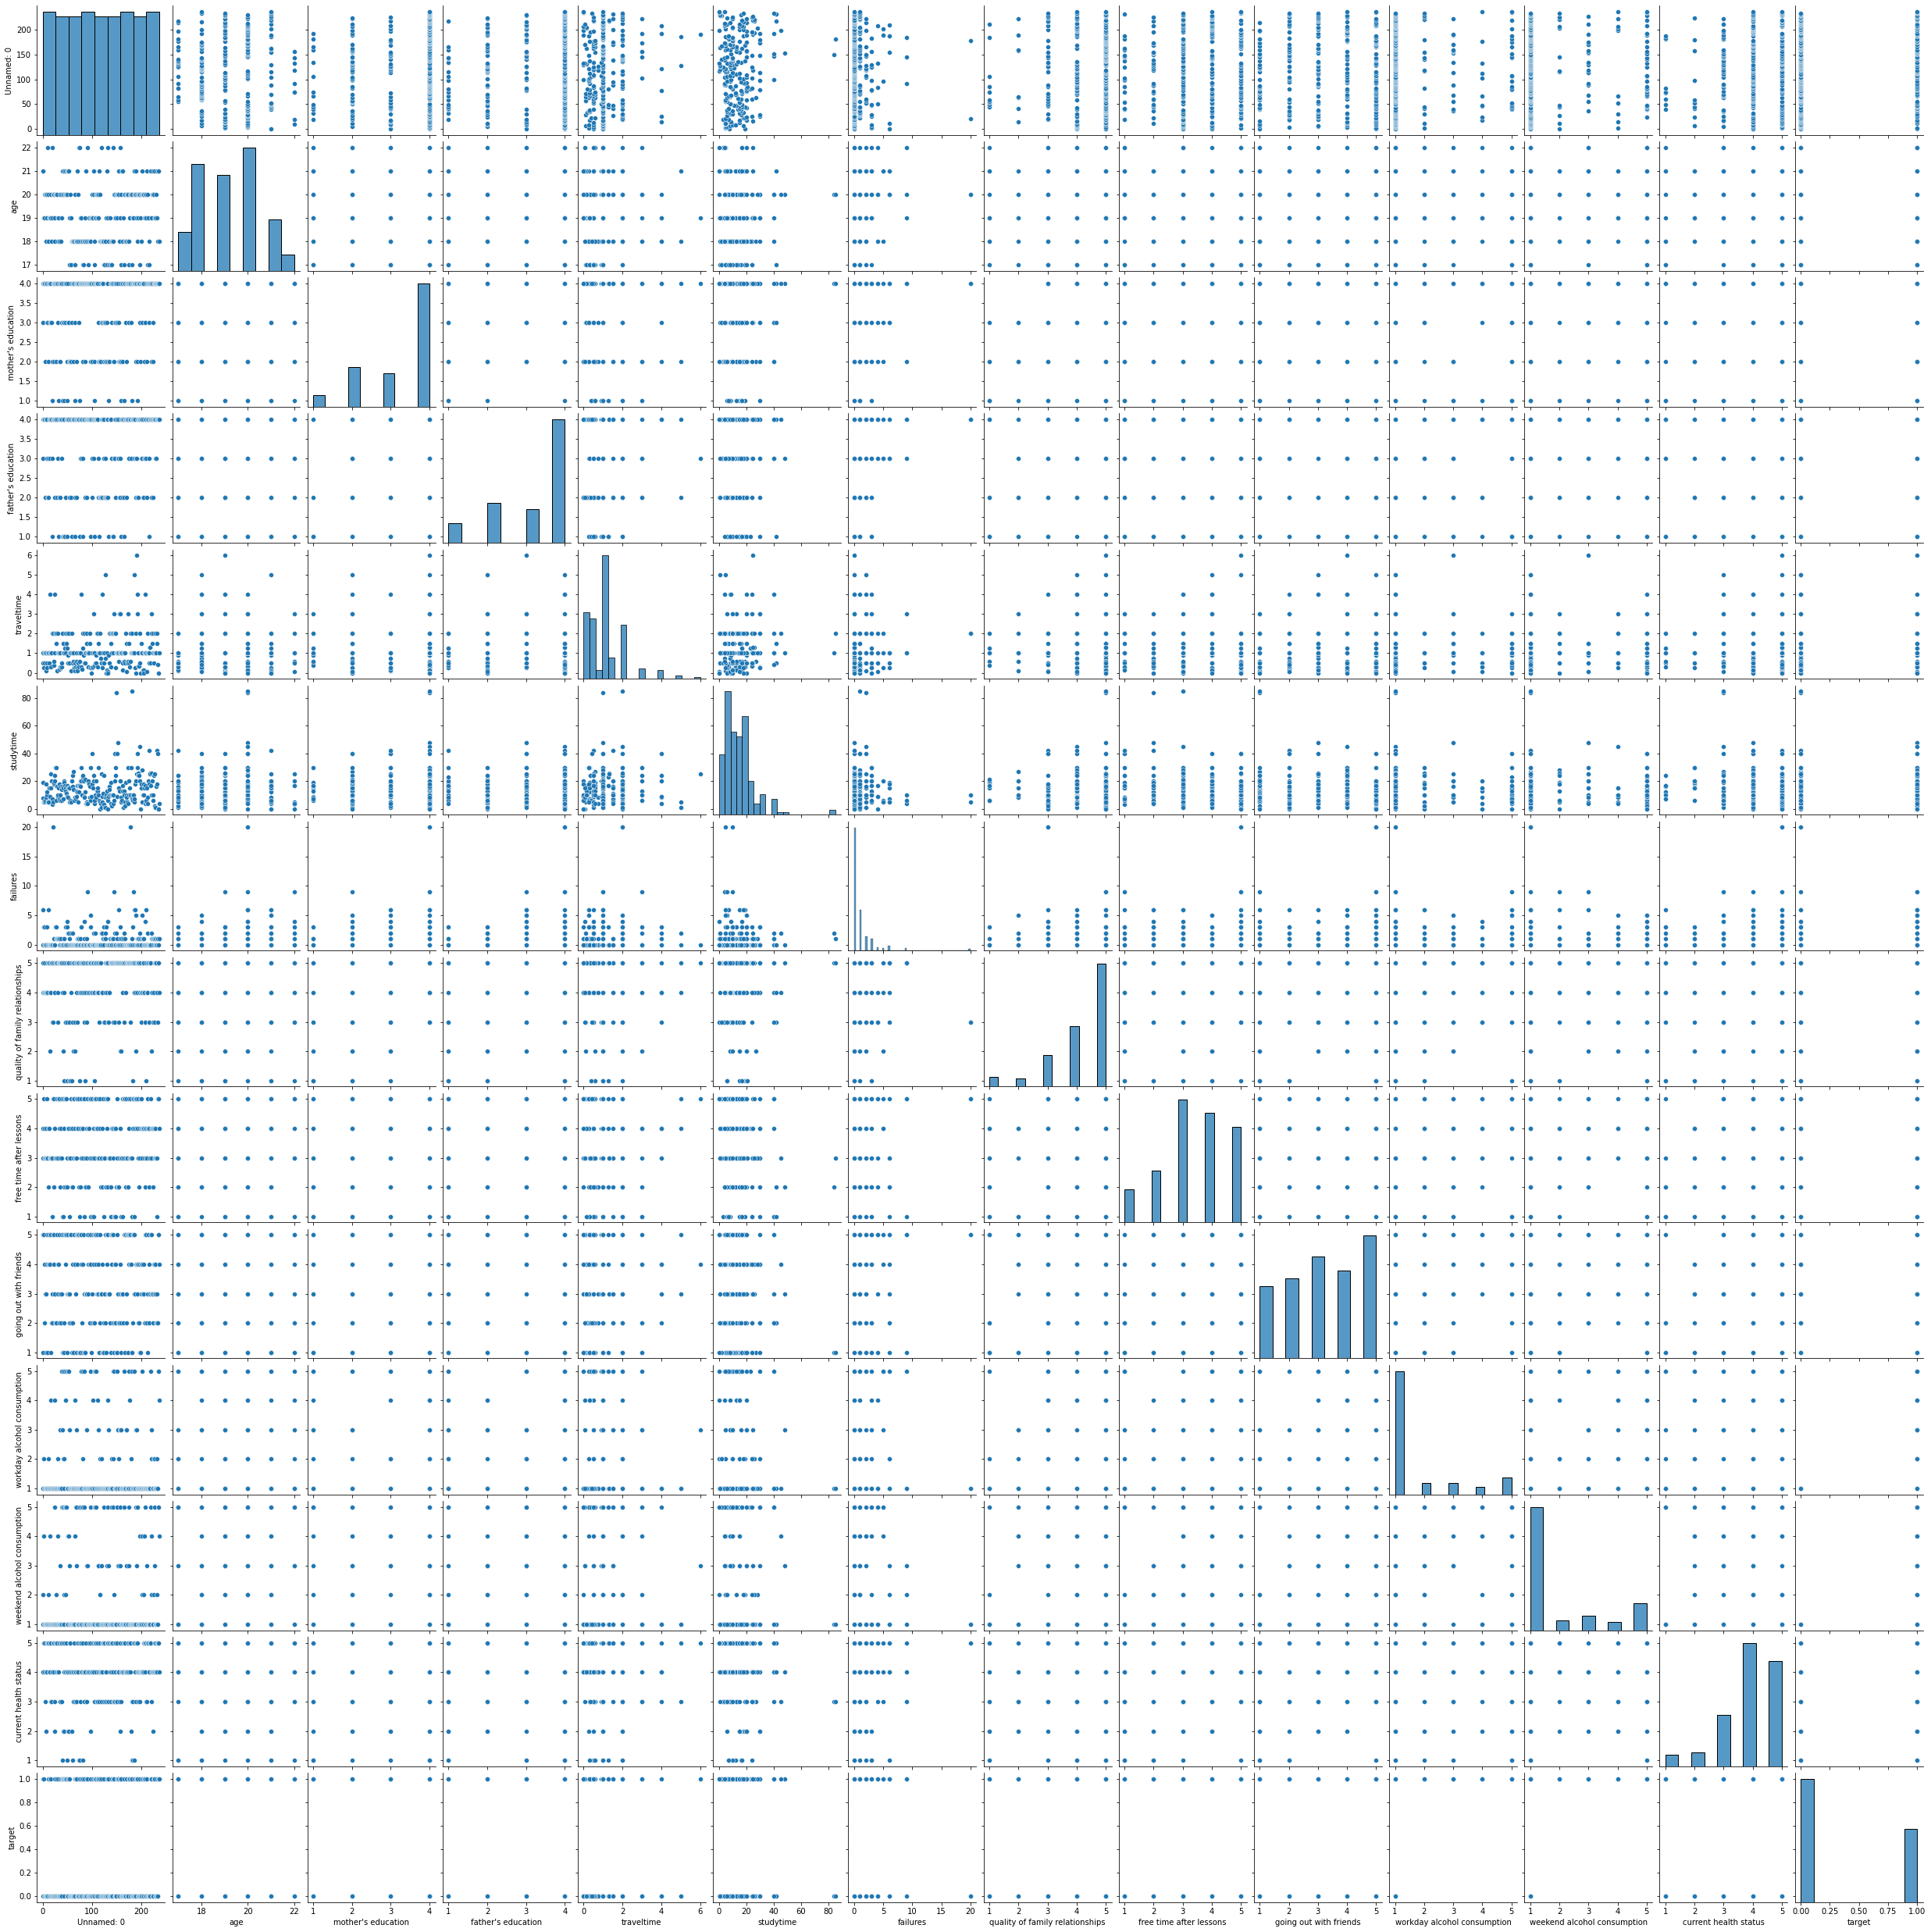

In [28]:
sns.pairplot(df)
# Visualisation of correlations pair parameters matrix 

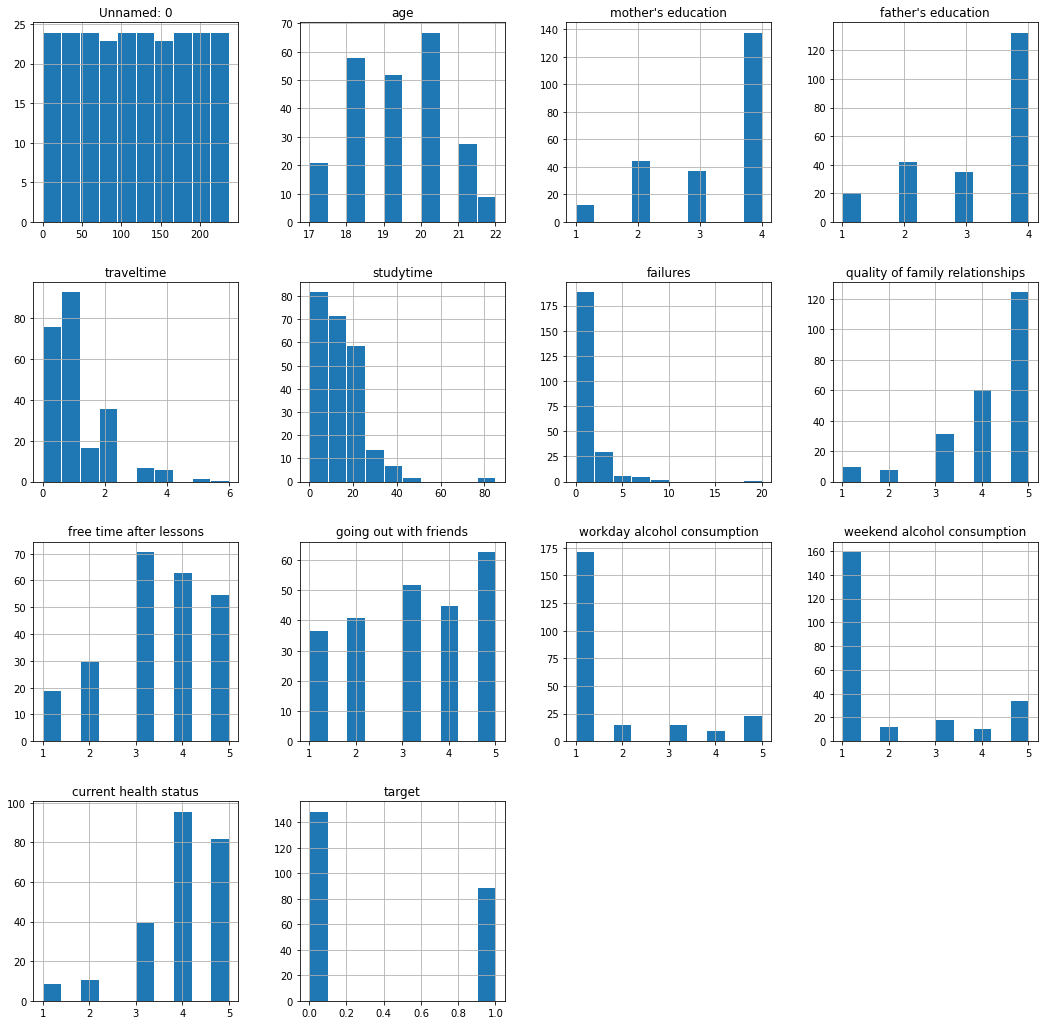

In [29]:
# Showing the distribution of dataset (numeric parameters)
distr = df.columns
numbers = df[distr]

numbers.hist(figsize=(18,18), edgecolor='white')

plt.show()
# For example...

## Making Analysis on nominal data

<AxesSubplot:ylabel='studytime'>

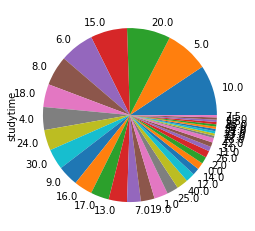

In [44]:
df['studytime'].value_counts().plot.pie()
# Here you can see the number of hours spent on study weekly. The most common valaue is 10 hours, then 5, 20 and 15

<AxesSubplot:ylabel='failures'>

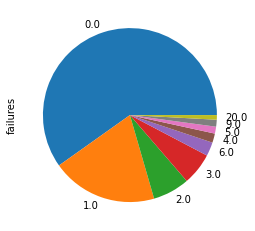

In [48]:
df['failures'].value_counts().plot.pie()
# Here shown the number of retakes. The majority of students has no retakes and the most common ones are 1 2 and 3
